## ResNet

### Loading classes

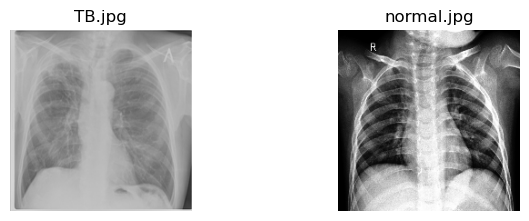

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
path='//Users//swetha//Documents//DLipynb files//DL//Lungs//inf'
image=[]
lungs=[]
for j in os.listdir(path):
    if j.split('.')[-1]=='jpg':
        img=cv2.imread(os.path.join(path,j))
        img=cv2.resize(img,(200,200))
        image.append(img)
        lungs.append(j)
plt.figure(figsize=(12,8))
c=1
for i in range(0,len(image)):
    plt.subplot(3,3,c)
    plt.imshow(np.array(cv2.cvtColor(image[i],cv2.COLOR_BGR2RGB)))
    plt.title(lungs[i])
    plt.axis('off')
    c+=1

### Loading Traning data

In [ ]:
path = '//Users//swetha//Documents//DLipynb files//DL//Lungs//train'
classes = {'Normal': 0, 'Tuberculosis': 1}
X_train= []
Y_train= []
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        if j.split('.')[-1]=='jpg':
            img = cv2.imread(os.path.join(pth, j))
            img = cv2.resize(img, (200, 200))
            X_train.append(img)
            Y_train.append(classes[cls])

### Loading Validation data

In [ ]:
path = '//Users//swetha//Documents//DLipynb files/DL/Lungs/val'
classes = {'Normal': 0, 'Tuberculosis': 1}
X_val= []
Y_val= []
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        if j.split('.')[-1]=='jpg':
            img = cv2.imread(os.path.join(pth, j))
            img = cv2.resize(img, (200, 200))
            X_val.append(img)
            Y_val.append(classes[cls])

### Loading Testing data

In [ ]:
path = '//Users//swetha//Documents//DLipynb filesDL//Lungs//test'
classes = {'Normal': 0, 'Tuberculosis': 1}
X_test= []
Y_test= []
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        if j.split('.')[-1]=='jpg':
            img = cv2.imread(os.path.join(pth, j))
            img = cv2.resize(img, (200, 200))
            X_test.append(img)
            Y_test.append(classes[cls])

### Processing sets

In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_train = X_train.reshape(X_train.shape[0], 200, 200, 3)
X_val = X_val.reshape(X_val.shape[0], 200, 200, 3)
X_test = X_test.reshape(X_test.shape[0], 200, 200, 3)
X_train=X_train.astype('float32')
X_val=X_val.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_val/=255
X_test/=255
from tensorflow.keras.utils import to_categorical
Y_train,Y_val, Y_test = to_categorical(Y_train),to_categorical(Y_val), to_categorical(Y_test)

### Custom CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.layers import BatchNormalization, RandomFlip,RandomRotation,RandomZoom, Input
model1 = Sequential([
    Input(shape=(200,200,3)),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)])
# convolutional layer
model1.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
# convolutional layer
model1.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
# flatten output of conv
model1.add(Flatten())

# hidden layer
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))

# output layer
model1.add(Dense(2, activation='softmax'))

In [ ]:
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 200, 200, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 200, 200, 3)       0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 100, 100, 32)      1

In [ ]:
history1=model1.fit(X_train, Y_train, batch_size=32, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
76/76 [==============================] - 41s 530ms/step - loss: 1.8440 - accuracy: 0.8953 - val_loss: 1.6645 - val_accuracy: 0.7550
Epoch 2/10
76/76 [==============================] - 40s 531ms/step - loss: 1.0504 - accuracy: 0.9534 - val_loss: 11.5554 - val_accuracy: 0.5124
Epoch 3/10
76/76 [==============================] - 42s 552ms/step - loss: 0.7029 - accuracy: 0.9559 - val_loss: 8.4250 - val_accuracy: 0.5111
Epoch 4/10
76/76 [==============================] - 42s 552ms/step - loss: 0.3273 - accuracy: 0.9757 - val_loss: 13.4933 - val_accuracy: 0.5656
Epoch 5/10
76/76 [==============================] - 41s 544ms/step - loss: 0.3708 - accuracy: 0.9781 - val_loss: 128.4087 - val_accuracy: 0.4975
Epoch 6/10
76/76 [==============================] - 40s 531ms/step - loss: 0.3427 - accuracy: 0.9724 - val_loss: 6.3950 - val_accuracy: 0.6832
Epoch 7/10
76/76 [==============================] - 40s 532ms/step - loss: 0.2044 - accuracy: 0.9823 - val_loss: 120.6310 - val_accuracy: 

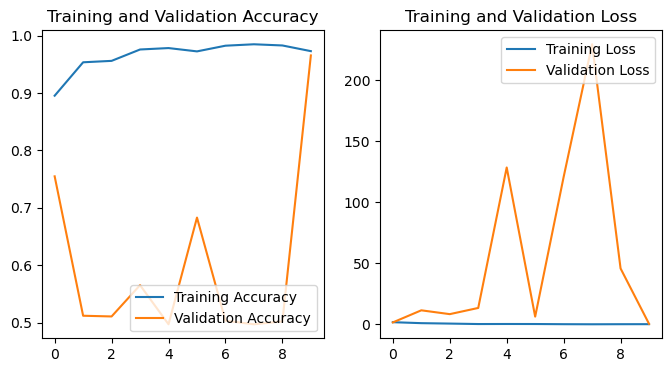

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### ResNet

In [ ]:
from tensorflow.keras.applications import resnet
model_resnet = resnet.ResNet50(input_shape=(200,200,3), include_top=False, weights='imagenet')

94765736/94765736 [==============================] - 22s 0us/step


In [ ]:
for layer in model_resnet.layers:
   layer.trainable=False
model_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 206, 206, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 100, 100, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 100, 100, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
model = Sequential()
model.add(model_resnet)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               12845184  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, Y_train, batch_size=32, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
76/76 [==============================] - 63s 814ms/step - loss: 1.5173 - accuracy: 0.5080 - val_loss: 0.6931 - val_accuracy: 0.4975
Epoch 2/10
76/76 [==============================] - 60s 798ms/step - loss: 0.7084 - accuracy: 0.4870 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 3/10
76/76 [==============================] - 61s 802ms/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 4/10
76/76 [==============================] - 61s 802ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 5/10
76/76 [==============================] - 61s 802ms/step - loss: 0.6932 - accuracy: 0.4977 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 6/10
76/76 [==============================] - 61s 806ms/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 7/10
76/76 [==============================] - 61s 800ms/step - loss: 0.6932 - accuracy: 0.4948 - val_loss: 0.6931 - val_accuracy: 0.5025

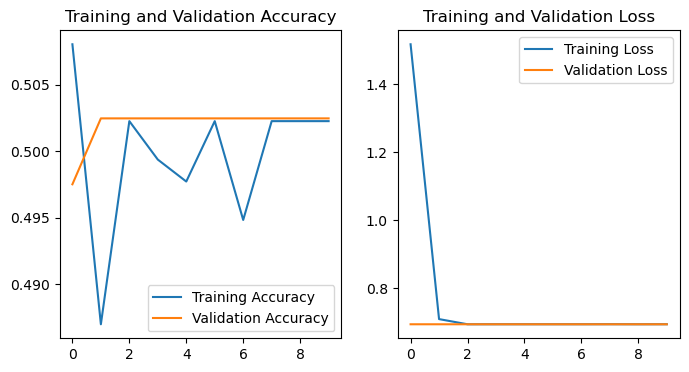

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Predictions

[1. 0.]
1/1 [==============================] - 0s 52ms/step
According to custom-CNN this image most likely belongs to Normal 
According to ResNet this image most likely belongs to Tuberculosis 


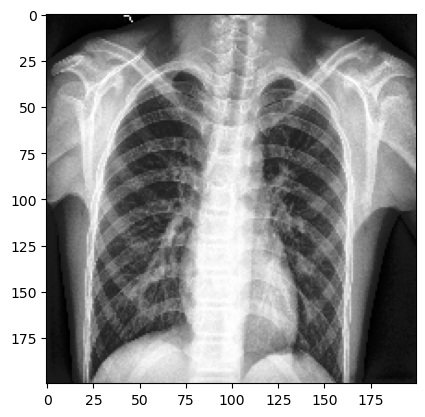

In [ ]:
import tensorflow as tf
import random
class_names=['Normal','Tuberculosis']
number=random.randint(0,X_test.shape[0])
img_array=np.expand_dims(X_test[number], axis=0)
print(Y_test[number])
predictions = model1.predict(img_array)
score = tf.nn.softmax(predictions[0])
predictions = model.predict(img_array)
score1 = tf.nn.softmax(predictions[0])
plt.imshow(np.array(cv2.cvtColor(X_test[number],cv2.COLOR_BGR2RGB)))
print(
    "According to custom-CNN this image most likely belongs to {} "
    .format(class_names[np.argmax(score)]))
print(
    "According to ResNet this image most likely belongs to {} "
    .format(class_names[np.argmax(score1)]))